In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import seaborn as sns
sns.set(rc={'figure.figsize':(10,6)})
custom_colors = ["#4e89ae", "#c56183","#ed6663","#ffa372"] 

# Read Data


In [5]:
dataset_train = pd.read_csv('CMX_data.csv', sep=";")
#dataset_train = pd.read_csv('APL_data.csv', sep=";")
dataset_train = dataset_train.drop(columns=['Unnamed: 0','mack', 'rate_of_change','gdkl_kl', 'gdtt_kl', 'gdtt_gt'], axis=1)
print(dataset_train.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 460 entries, 0 to 459
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   date_publish      460 non-null    object 
 1   price_adjustment  460 non-null    float64
 2   price_closing     460 non-null    float64
 3   gdkl_gt           460 non-null    int64  
 4   price_open        460 non-null    float64
 5   price_highest     460 non-null    float64
 6   price_lowest      460 non-null    float64
dtypes: float64(5), int64(1), object(1)
memory usage: 25.3+ KB
None


In [6]:
dataset_train.head()

,date_publish,price_adjustment,price_closing,gdkl_gt,price_open,price_highest,price_lowest
0,2020-12-31,14.23,17.90,46907000000,16.8,17.90,16.8
1,2021-01-04,14.43,18.15,13818000000,18.3,18.40,17.9
2,2021-01-05,14.95,18.80,19823000000,18.3,19.00,17.9
3,2021-01-06,14.51,18.25,18649000000,18.8,18.95,18.2
4,2021-01-07,15.18,19.10,20469000000,18.3,19.10,18.1


In [7]:
#xu ly null
missing_value = pd.DataFrame(dataset_train.isna().sum().sort_values(ascending=False), columns= ['Missing_values'])

missing_value['%'] = (missing_value.Missing_values/459)*100

In [8]:
missing_value

,Missing_values,%
date_publish,0,0.0
price_adjustment,0,0.0
price_closing,0,0.0
gdkl_gt,0,0.0
price_open,0,0.0
price_highest,0,0.0
price_lowest,0,0.0


In [9]:
dataset_train['date_publish'] = pd.to_datetime(dataset_train['date_publish'])

dataset_train.head(10)

,date_publish,price_adjustment,price_closing,gdkl_gt,price_open,price_highest,price_lowest
0,2020-12-31,14.23,17.90,46907000000,16.8,17.90,16.80
1,2021-01-04,14.43,18.15,13818000000,18.3,18.40,17.90
2,2021-01-05,14.95,18.80,19823000000,18.3,19.00,17.90
3,2021-01-06,14.51,18.25,18649000000,18.8,18.95,18.20
4,2021-01-07,15.18,19.10,20469000000,18.3,19.10,18.10
5,2021-01-08,14.87,18.70,15000000000,19.2,19.60,18.40
6,2021-01-11,14.95,18.80,10169000000,18.7,19.00,18.35
7,2021-01-12,15.30,19.25,15613000000,18.8,19.30,18.50
8,2021-01-13,15.26,19.20,21505000000,19.4,20.00,18.90
9,2021-01-14,15.26,19.20,10767000000,19.3,19.60,19.00


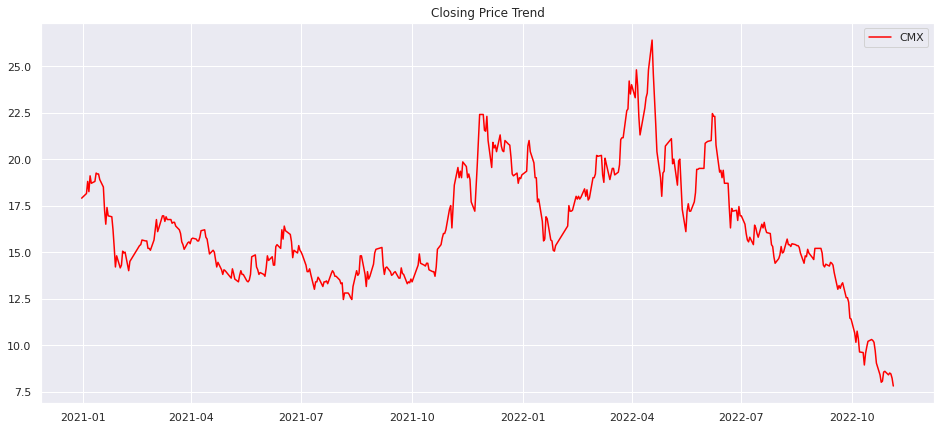

In [10]:
fig = plt.figure(figsize = (16,7))

plt.plot(dataset_train.date_publish,dataset_train.price_closing,color='red')

plt.title('Closing Price Trend')
plt.legend(['CMX'])
plt.show()

Text(0.5, 1.0, 'CMX')

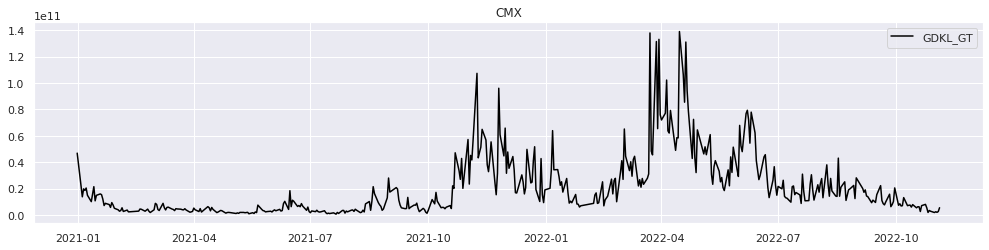

In [11]:
fig = plt.figure(figsize = (17,17))

plt.subplot(4, 1, 1)
plt.plot(dataset_train.date_publish,dataset_train.gdkl_gt,color='black')
plt.legend(['GDKL_GT'])
plt.title('CMX')

Text(0.5, 1.0, 'CMX')

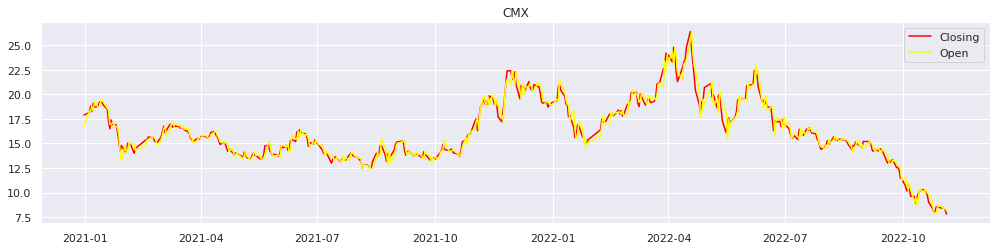

In [12]:
fig = plt.figure(figsize = (17,17))

plt.subplot(4, 1, 1)
plt.plot(dataset_train.date_publish,dataset_train.price_closing,color='red')
plt.plot(dataset_train.date_publish,dataset_train.price_open,color='yellow')
plt.legend(['Closing','Open'])
plt.title('CMX')

Text(0.5, 1.0, 'CMX')

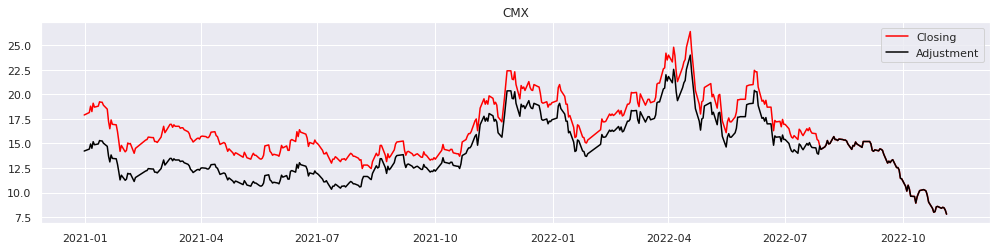

In [13]:
fig = plt.figure(figsize = (17,17))

plt.subplot(4, 1, 1)
plt.plot(dataset_train.date_publish,dataset_train.price_closing,color='red')
plt.plot(dataset_train.date_publish,dataset_train.price_adjustment,color='black')
plt.legend(['Closing','Adjustment'])
plt.title('CMX')

Text(0.5, 1.0, 'CMX')

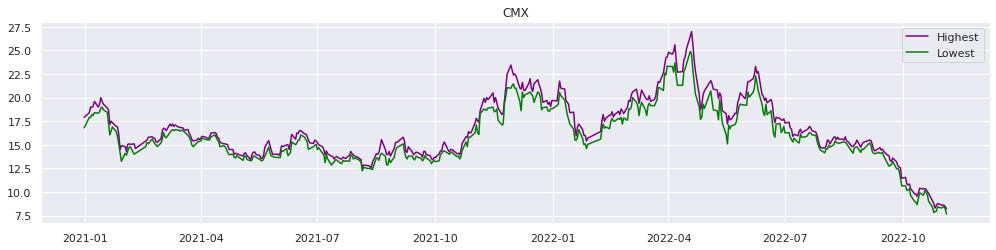

In [14]:
fig = plt.figure(figsize = (17,17))

plt.subplot(4, 1, 1)
plt.plot(dataset_train.date_publish,dataset_train.price_highest,color='purple')
plt.plot(dataset_train.date_publish,dataset_train.price_lowest,color='green')
plt.legend(['Highest','Lowest'])
plt.title('CMX')

# 

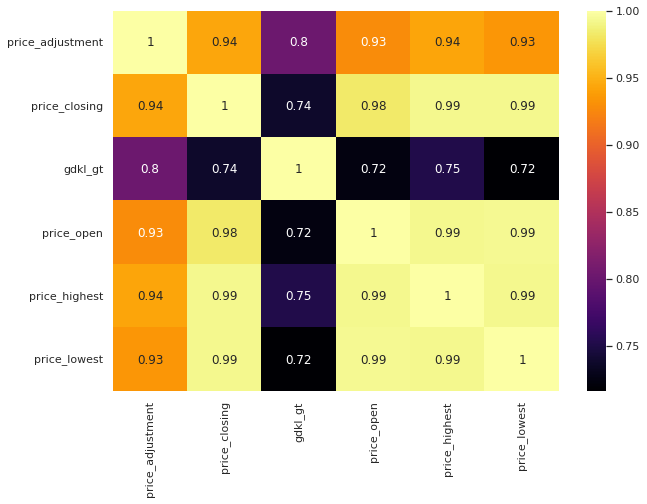

In [15]:
# Heatmap

plt.figure(figsize=(10,7))
sns.heatmap(dataset_train.corr(), annot=True, cmap='inferno');

- gdkl_gt và price_open có độ tương quan thấp.
=> Sử dụng 2 features làm x_train

# Processing Data

In [16]:
data = dataset_train.iloc[:, 2:4]
data.head()

,price_closing,gdkl_gt
0,17.90,46907000000
1,18.15,13818000000
2,18.80,19823000000
3,18.25,18649000000
4,19.10,20469000000


In [17]:
from sklearn.preprocessing import MinMaxScaler

sc = MinMaxScaler(feature_range=(0,1))

training_set_scaled = sc.fit_transform(data)

print(training_set_scaled[:5])

[[0.54301075 0.33415954]
 [0.55645161 0.0950478 ]
 [0.59139785 0.13844186]
 [0.56182796 0.12995816]
 [0.60752688 0.14311006]]


In [18]:
before_predicted_day = 60
predicted_14_day = 14
predicted_49_day = 49

In [19]:
X_train = []
Y_train = []

for i in range(before_predicted_day, len(training_set_scaled)):
  X_train.append(training_set_scaled[i-before_predicted_day:i])
  Y_train.append(training_set_scaled[i, :])


X_train, Y_train = np.array(X_train), np.array(Y_train)

In [20]:
print(X_train.shape)
print(Y_train.shape)

(400, 60, 2)
(400, 2)


In [21]:
X_train_price = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 2))


In [22]:
real_CMX_price_14_days = data.iloc[len(data) - (predicted_14_day):len(data)+1]
print(real_CMX_price_14_days.shape)

real_CMX_price_49_days = data.iloc[len(data) - (predicted_49_day):len(data)+1]
print(real_CMX_price_49_days.shape)

(14, 2)
(49, 2)


In [23]:
data_test = data.iloc[len(data) - (before_predicted_day+predicted_14_day+1):len(data) - (predicted_14_day)]

data_train = dataset_train.iloc[:,2:4]

dataset_total = pd.concat([data_train,data_test], axis = 0)

inputs = dataset_total[len(dataset_total) - len(data_test) - before_predicted_day:].values
inputs = sc.fit_transform(inputs)
print(inputs.T)
X_test_14_days = []
for i in range(before_predicted_day, before_predicted_day + predicted_14_day):
  X_test_14_days.append(inputs[i-before_predicted_day:i])
  print(inputs[i-before_predicted_day:i])
X_test_14_days = np.array(X_test_14_days)
X_test_14_days = X_test_14_days[::-1]
print(X_test_14_days)

[[0.88757396 0.90532544 0.89940828 0.89349112 0.89349112 0.8816568
  0.84615385 0.78106509 0.82840237 0.82248521 0.86982249 0.84615385
  0.81656805 0.80473373 0.87573964 0.87573964 0.84615385 0.76923077
  0.75739645 0.77514793 0.76331361 0.78698225 0.78106509 0.76923077
  0.72189349 0.61538462 0.63905325 0.62130178 0.64497041 0.65680473
  0.56213018 0.56213018 0.53254438 0.43195266 0.4260355  0.33727811
  0.27810651 0.34911243 0.30177515 0.21656805 0.21301775 0.13372781
  0.20710059 0.24852071 0.28402367 0.29585799 0.28994083 0.27810651
  0.22485207 0.14556213 0.07100592 0.02366864 0.03076923 0.0887574
  0.09349112 0.07100592 0.08284024 0.07692308 0.04970414 0.
  1.         0.97633136 0.9704142  0.89940828 0.88757396 0.82248521
  0.78106509 0.81065089 0.83431953 0.88757396 0.84615385 0.85207101
  0.93491124 0.89940828 0.89940828 0.88757396 0.90532544 0.89940828
  0.89349112 0.89349112 0.8816568  0.84615385 0.78106509 0.82840237
  0.82248521 0.86982249 0.84615385 0.81656805 0.80473373 0

In [24]:
data_test = data.iloc[len(data) - (before_predicted_day+predicted_49_day+1):len(data) - (predicted_49_day)]

data_train = dataset_train.iloc[:,2:4]

dataset_total = pd.concat([data_train,data_test], axis = 0)

inputs = dataset_total[len(dataset_total) - len(data_test) - before_predicted_day:].values

inputs = sc.fit_transform(inputs)
X_test_49_days = []
for i in range(before_predicted_day, before_predicted_day + predicted_49_day):
  X_test_49_days.append(inputs[i-before_predicted_day:i])
X_test_49_days = np.array(X_test_49_days)
X_test_49_days = X_test_49_days[::-1]
print(X_test_49_days.shape)

(49, 60, 2)


In [25]:
X_test_14_days = np.reshape(X_test_14_days, (X_test_14_days.shape[0], X_test_14_days.shape[1],2))
print(X_test_14_days.shape)

X_test_49_days = np.reshape(X_test_49_days, (X_test_49_days.shape[0], X_test_49_days.shape[1],2))
print(X_test_49_days.shape)



(14, 60, 2)
(49, 60, 2)


# Modeling

In [28]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import SimpleRNN
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Bidirectional
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.optimizers import SGD
from tensorflow.keras import regularizers

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

import tensorflow.keras
from keras.models import load_model
import tensorflow as tf
from tensorflow.keras.layers import SimpleRNN


import time
from sklearn import metrics
from sklearn.neural_network import MLPRegressor
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score
from sklearn import svm


- RNNs (Recurrent Neural Networks) 
## with avoiding Overfitting


In [ ]:
time_train = []
time_predict = []

RNN = Sequential()

# tranh overfitting
RNN.add(SimpleRNN(units= 60, activation= 'softsign',
    kernel_regularizer=tensorflow.keras.regularizers.l2(0.01),
    recurrent_regularizer=tensorflow.keras.regularizers.l2(0.01),
    bias_regularizer=tensorflow.keras.regularizers.l2(0.01),
    return_sequences = True))

RNN.add(Dropout(0.1))

RNN.add(SimpleRNN(
    units=60,
    activation='softsign',
    return_sequences=False,
    input_shape = (60,2)))

RNN.add(Dense(30, kernel_initializer='normal', activation='sigmoid'))

RNN.add(Dense(2,kernel_initializer="glorot_normal",activation='softmax'))

RNN.compile(optimizer = 'adam', loss= 'mean_squared_error', metrics=['accuracy'])
RNN.build(X_train_price.shape)

start_time = time.time()
H_RNN = RNN.fit(X_train, Y_train, epochs = 100, batch_size= 60, verbose=2)
time_train.append(time.time() - start_time)

Epoch 1/100
7/7 - 3s - loss: 0.7105 - accuracy: 0.4750 - 3s/epoch - 362ms/step
Epoch 2/100
7/7 - 0s - loss: 0.6381 - accuracy: 0.9775 - 220ms/epoch - 31ms/step
Epoch 3/100
7/7 - 0s - loss: 0.5904 - accuracy: 0.9775 - 229ms/epoch - 33ms/step
Epoch 4/100
7/7 - 0s - loss: 0.5461 - accuracy: 0.9775 - 246ms/epoch - 35ms/step
Epoch 5/100
7/7 - 0s - loss: 0.5055 - accuracy: 0.9775 - 238ms/epoch - 34ms/step
Epoch 6/100
7/7 - 0s - loss: 0.4692 - accuracy: 0.9775 - 217ms/epoch - 31ms/step
Epoch 7/100
7/7 - 0s - loss: 0.4358 - accuracy: 0.9775 - 226ms/epoch - 32ms/step
Epoch 8/100
7/7 - 0s - loss: 0.4054 - accuracy: 0.9775 - 223ms/epoch - 32ms/step
Epoch 9/100
7/7 - 0s - loss: 0.3775 - accuracy: 0.9775 - 239ms/epoch - 34ms/step
Epoch 10/100
7/7 - 0s - loss: 0.3521 - accuracy: 0.9775 - 218ms/epoch - 31ms/step
Epoch 11/100
7/7 - 0s - loss: 0.3288 - accuracy: 0.9775 - 228ms/epoch - 33ms/step
Epoch 12/100
7/7 - 0s - loss: 0.3076 - accuracy: 0.9775 - 235ms/epoch - 34ms/step
Epoch 13/100
7/7 - 0s - los

In [ ]:
start_time = time.time()
predicted_CMX_price_14_days = RNN.predict(X_test_14_days)
predicted_CMX_price_49_days = RNN.predict(X_test_49_days)
time_predict.append(time.time()-start_time)
print(predicted_CMX_price_14_days.T)
print(predicted_CMX_price_49_days.T)

2/2 [==============================] - 0s 11ms/step
[[0.6686835  0.6655932  0.6626355  0.66582805 0.6717658  0.6796891
  0.68831694 0.68805325 0.67263615 0.63687396 0.58700836 0.54350156
  0.5224219  0.51862943]
 [0.33131638 0.33440676 0.3373644  0.3341719  0.32823414 0.3203108
  0.31168303 0.31194678 0.32736385 0.363126   0.41299164 0.45649844
  0.4775781  0.48137057]]
[[0.63914996 0.6413785  0.6408608  0.6414219  0.64403003 0.6490174
  0.6590153  0.669447   0.68053114 0.6867966  0.6896427  0.6898706
  0.6930677  0.6956938  0.69789875 0.6993908  0.7043484  0.7106471
  0.7155663  0.7187333  0.7186063  0.7171509  0.7156146  0.7155428
  0.71498644 0.713054   0.70640796 0.69504684 0.67857194 0.6595182
  0.64191914 0.6317554  0.63583    0.6491277  0.6599036  0.6569378
  0.63892394 0.6114781  0.5861387  0.5663479  0.554327   0.5437573
  0.5350132  0.5238532  0.5203487  0.5151684  0.51005    0.5052301
  0.50606   ]
 [0.36085013 0.35862148 0.3591391  0.35857815 0.35596994 0.35098264
  0.34098

In [ ]:
predicted_CMX_price_14_days = sc.inverse_transform(predicted_CMX_price_14_days)
predicted_CMX_price_49_days = sc.inverse_transform(predicted_CMX_price_49_days)

In [ ]:
print(predicted_CMX_price_14_days[:,0])
print(real_CMX_price_14_days.T.values)

print(predicted_CMX_price_49_days[:,0])
print(real_CMX_price_49_days.T.values)

[17.596214 17.55094  17.50761  17.55438  17.641369 17.757444 17.883844
 17.87998  17.65412  17.130205 16.399673 15.762298 15.453481 15.397922]
[[1.025e+01 1.015e+01 9.700e+00 9.030e+00 8.400e+00 8.000e+00 8.060e+00
  8.550e+00 8.590e+00 8.400e+00 8.500e+00 8.450e+00 8.220e+00 7.800e+00]
 [6.277e+09 6.274e+09 2.682e+09 7.127e+09 8.086e+09 5.541e+09 1.965e+09
  3.457e+09 2.884e+09 1.921e+09 2.502e+09 2.056e+09 2.659e+09 5.546e+09]]
[17.163548  17.196196  17.188612  17.196833  17.23504   17.308105
 17.454575  17.607399  17.769781  17.86157   17.903265  17.906605
 17.953442  17.991915  18.024218  18.046076  18.118704  18.210981
 18.283047  18.329443  18.327581  18.306261  18.283754  18.282703
 18.274551  18.24624   18.148876  17.982435  17.74108   17.46194
 17.204117  17.055216  17.114908  17.309721  17.467587  17.424139
 17.160236  16.758154  16.386932  16.096996  15.920892  15.766046
 15.637944  15.47445   15.423109  15.3472185 15.272232  15.201621
 15.213779 ]
[[1.4950e+01 1.4700e+01 1.

(14,)


Text(0.5, 1.0, 'CMX predicted 14 days next')

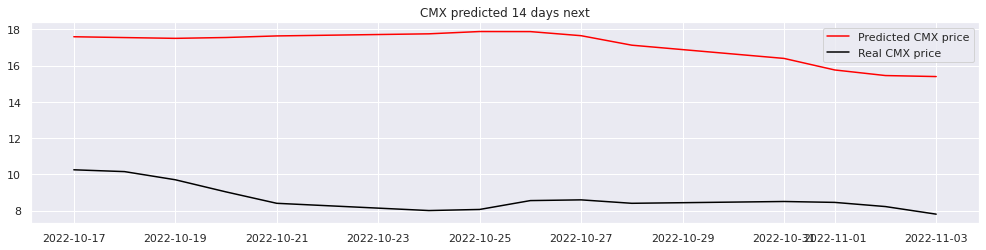

In [ ]:
date = dataset_train['date_publish']

predicted_date = date[len(date) - (predicted_14_day + 1):-1]
print(predicted_date.shape)
fig = plt.figure(figsize = (17,17))

plt.subplot(4, 1, 1)
plt.plot(predicted_date,predicted_CMX_price_14_days[:,0],color='red')
plt.plot(predicted_date,real_CMX_price_14_days['price_closing'],color='black')
plt.legend(['Predicted CMX price','Real CMX price'])
plt.title('CMX predicted 14 days next')



(49,)


Text(0.5, 1.0, 'CMX 49 days next')

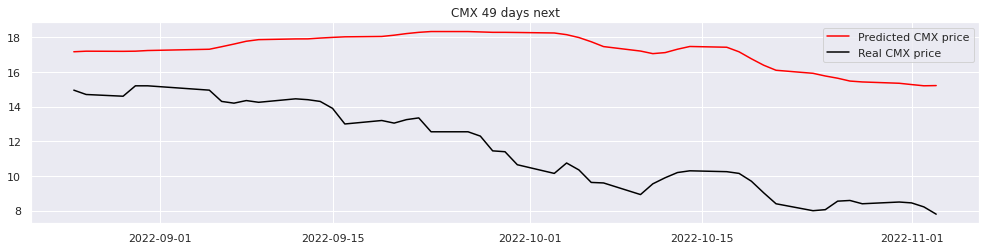

In [ ]:
date = dataset_train['date_publish']

predicted_date = date[len(date) - (predicted_49_day + 1):-1]
print(predicted_date.shape)
fig = plt.figure(figsize = (17,17))

plt.subplot(4, 1, 1)
plt.plot(predicted_date,predicted_CMX_price_49_days[:,0],color='red')
plt.plot(predicted_date,real_CMX_price_49_days['price_closing'],color='black')
plt.legend(['Predicted CMX price','Real CMX price'])
plt.title('CMX 49 days next')

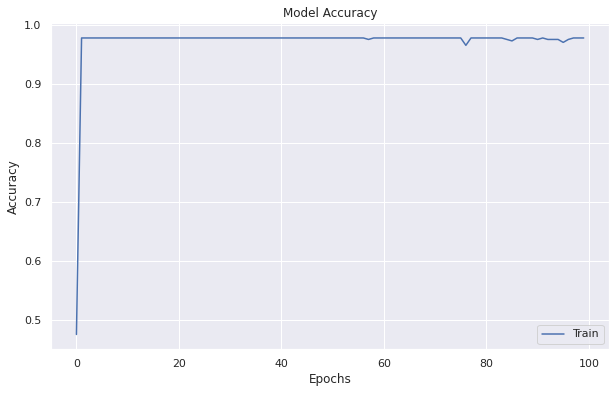

13/13 [==============================] - 0s 8ms/step
Mean Squared Error:  0.06806976848274573
13/13 [==============================] - 0s 10ms/step
Mean Absolute Error:  0.23051816139996542
13/13 [==============================] - 0s 9ms/step
R2 Score:  -1.1147202999293069


In [ ]:
H_RNN.history.keys()

plt.plot(H_RNN.history['accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['Train'])
plt.show()

print('Mean Squared Error: ', metrics.mean_squared_error(Y_train, RNN.predict(X_train)))
print('Mean Absolute Error: ', metrics.mean_absolute_error(Y_train, RNN.predict(X_train)))
print('R2 Score: ', metrics.r2_score(Y_train, RNN.predict(X_train)))

- 
  ## without avoiding Overfitting

In [ ]:
RNN_Overfitting = Sequential()

# bi overfitting
RNN_Overfitting.add(SimpleRNN(units= 60, activation= 'softsign', return_sequences = True))

RNN_Overfitting.add(SimpleRNN(
    units=60,
    activation='softsign',
    return_sequences=False,
    input_shape = (60,2)))

RNN_Overfitting.add(Dense(30,kernel_initializer="glorot_normal", activation='sigmoid'))

RNN_Overfitting.add(Dense(2,kernel_initializer="glorot_normal",activation='softmax'))

RNN_Overfitting.compile(optimizer = 'adam', loss= 'mean_squared_error', metrics=['accuracy'])
RNN_Overfitting.build(X_train_price.shape)
start_time = time.time()
H_RNN_Overfitting = RNN_Overfitting.fit(X_train, Y_train, epochs = 100, batch_size= 60, verbose=2)
time_train.append(time.time() - start_time)


Epoch 1/100
7/7 - 2s - loss: 0.0963 - accuracy: 0.9775 - 2s/epoch - 267ms/step
Epoch 2/100
7/7 - 0s - loss: 0.0720 - accuracy: 0.9775 - 203ms/epoch - 29ms/step
Epoch 3/100
7/7 - 0s - loss: 0.0728 - accuracy: 0.9775 - 201ms/epoch - 29ms/step
Epoch 4/100
7/7 - 0s - loss: 0.0708 - accuracy: 0.9775 - 197ms/epoch - 28ms/step
Epoch 5/100
7/7 - 0s - loss: 0.0707 - accuracy: 0.9775 - 193ms/epoch - 28ms/step
Epoch 6/100
7/7 - 0s - loss: 0.0705 - accuracy: 0.9775 - 207ms/epoch - 30ms/step
Epoch 7/100
7/7 - 0s - loss: 0.0704 - accuracy: 0.9775 - 207ms/epoch - 30ms/step
Epoch 8/100
7/7 - 0s - loss: 0.0703 - accuracy: 0.9775 - 193ms/epoch - 28ms/step
Epoch 9/100
7/7 - 0s - loss: 0.0702 - accuracy: 0.9775 - 204ms/epoch - 29ms/step
Epoch 10/100
7/7 - 0s - loss: 0.0702 - accuracy: 0.9775 - 196ms/epoch - 28ms/step
Epoch 11/100
7/7 - 0s - loss: 0.0702 - accuracy: 0.9775 - 214ms/epoch - 31ms/step
Epoch 12/100
7/7 - 0s - loss: 0.0702 - accuracy: 0.9775 - 192ms/epoch - 27ms/step
Epoch 13/100
7/7 - 0s - los

In [ ]:
start_time = time.time()
predicted_CMX_price_14_days = RNN_Overfitting.predict(X_test_14_days)
predicted_CMX_price_49_days = RNN_Overfitting.predict(X_test_49_days)
time_predict.append(time.time() - start_time)
print(predicted_CMX_price_14_days.T)
print(predicted_CMX_price_49_days.T)

2/2 [==============================] - 0s 12ms/step
[[0.62468356 0.6506934  0.6861271  0.6855012  0.7179324  0.71506554
  0.7180105  0.7246144  0.71790993 0.6820423  0.64514613 0.58107346
  0.5593773  0.5179861 ]
 [0.37531653 0.34930664 0.31387293 0.3144989  0.28206757 0.28493446
  0.28198949 0.2753856  0.28209007 0.3179577  0.35485384 0.4189265
  0.4406227  0.48201388]]
[[0.6506014  0.6364715  0.6730512  0.61831695 0.6606891  0.6013281
  0.65707266 0.63811666 0.7058966  0.6725745  0.71346575 0.68039274
  0.7145847  0.70157975 0.7021903  0.69943976 0.6766675  0.6929022
  0.67837757 0.70086455 0.66666204 0.6929688  0.6690577  0.7041254
  0.6972226  0.7025696  0.693176   0.6828459  0.69117904 0.67113394
  0.658594   0.6183739  0.6468698  0.6318779  0.6973405  0.66307557
  0.699739   0.613129   0.6641129  0.5780517  0.66078115 0.57812274
  0.62962514 0.55912095 0.5782218  0.53485775 0.5465981  0.5296573
  0.5154801 ]
 [0.34939858 0.36352855 0.32694882 0.38168308 0.33931094 0.39867184
  0.

In [ ]:
predicted_CMX_price_14_days = sc.inverse_transform(predicted_CMX_price_14_days)
predicted_CMX_price_49_days = sc.inverse_transform(predicted_CMX_price_49_days)

In [ ]:
print(predicted_CMX_price_14_days[:,0])
print(real_CMX_price_14_days.T.values)

print(predicted_CMX_price_49_days[:,0])
print(real_CMX_price_49_days.T.values)

[16.951614 17.332659 17.851763 17.842594 18.317709 18.27571  18.318853
 18.415602 18.31738  17.79192  17.251392 16.312727 15.994879 15.388496]
[[1.025e+01 1.015e+01 9.700e+00 9.030e+00 8.400e+00 8.000e+00 8.060e+00
  8.550e+00 8.590e+00 8.400e+00 8.500e+00 8.450e+00 8.220e+00 7.800e+00]
 [6.277e+09 6.274e+09 2.682e+09 7.127e+09 8.086e+09 5.541e+09 1.965e+09
  3.457e+09 2.884e+09 1.921e+09 2.502e+09 2.056e+09 2.659e+09 5.546e+09]]
[17.33131  17.124308 17.6602   16.858343 17.479095 16.609457 17.426115
 17.148409 18.141386 17.653217 18.252274 17.767754 18.268667 18.078144
 18.087088 18.046793 17.713179 17.951017 17.738232 18.067667 17.566599
 17.951992 17.601696 18.115438 18.01431  18.092646 17.955029 17.803692
 17.925774 17.632113 17.448402 16.859179 17.276644 17.057013 18.016039
 17.514057 18.051176 16.782341 17.529255 16.268457 17.480444 16.269499
 17.024008 15.991122 16.27095  15.635667 15.807663 15.55948  15.351784]
[[1.4950e+01 1.4700e+01 1.4600e+01 1.5200e+01 1.5200e+01 1.4950e+01


(14,)


Text(0.5, 1.0, 'CMX 14 days next by RNN without avoiding Overffitting')

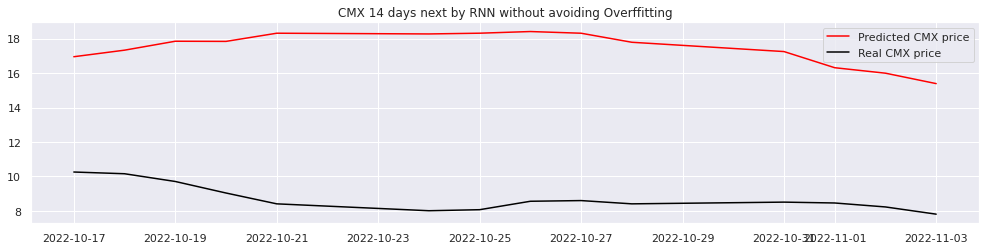

In [ ]:
date = dataset_train['date_publish']

predicted_date = date[len(date) - (predicted_14_day+1):-1]
print(predicted_date.shape)
fig = plt.figure(figsize = (17,17))

plt.subplot(4, 1, 1)
plt.plot(predicted_date,predicted_CMX_price_14_days[:,0],color='red')
plt.plot(predicted_date,real_CMX_price_14_days['price_closing'],color='black')
plt.legend(['Predicted CMX price','Real CMX price'])
plt.title('CMX 14 days next by RNN without avoiding Overffitting')


(49,)


Text(0.5, 1.0, 'CMX 49 days next by RNN without avoiding Overffitting')

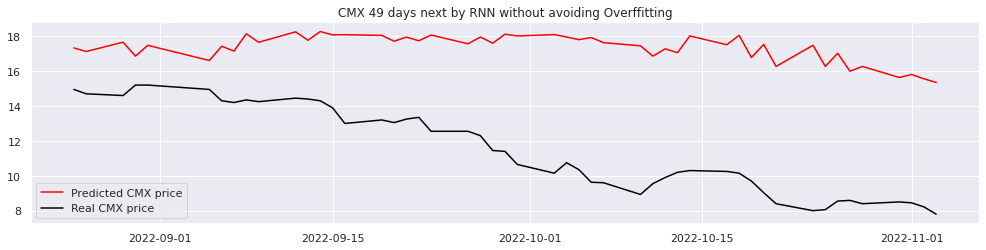

In [ ]:
date = dataset_train['date_publish']

predicted_date = date[len(date) - (predicted_49_day + 1):-1]
print(predicted_date.shape)
fig = plt.figure(figsize = (17,17))

plt.subplot(4, 1, 1)
plt.plot(predicted_date,predicted_CMX_price_49_days[:,0],color='red')
plt.plot(predicted_date,real_CMX_price_49_days['price_closing'],color='black')
plt.legend(['Predicted CMX price','Real CMX price'])
plt.title('CMX 49 days next by RNN without avoiding Overffitting')

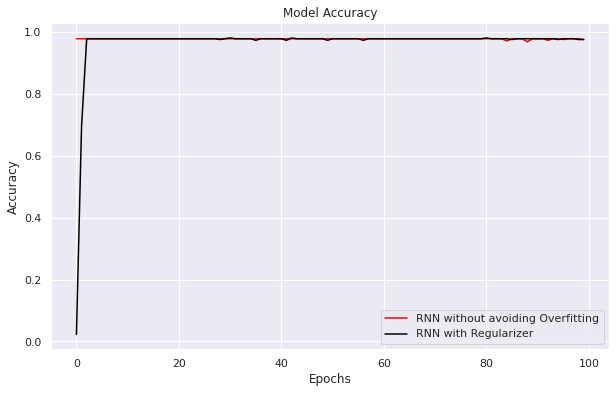

13/13 [==============================] - 0s 8ms/step
Mean Squared Error:  0.06803824824146272
13/13 [==============================] - 0s 8ms/step
Mean Absolute Error:  0.2307089491539283
13/13 [==============================] - 0s 10ms/step
R2 Score:  -1.1087928746713132


In [ ]:
H_RNN_Overfitting.history.keys()

plt.plot(H_RNN_Overfitting.history['accuracy'], color='red')
plt.plot(H_RNN.history['accuracy'], color='black')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['RNN without avoiding Overfitting','RNN with Regularizer'])
plt.show()

print('Mean Squared Error: ', metrics.mean_squared_error(Y_train, RNN_Overfitting.predict(X_train)))
print('Mean Absolute Error: ', metrics.mean_absolute_error(Y_train, RNN_Overfitting.predict(X_train)))
print('R2 Score: ', metrics.r2_score(Y_train, RNN_Overfitting.predict(X_train)))

- 
## Multi-Layer Perceptron (MLP)

In [ ]:
MLP = MLPRegressor(hidden_layer_sizes=(400,60), activation='relu', max_iter=1000)

start_time = time.time()
H_MLP = MLP.fit(X_train.reshape(X_train.shape[0], (X_train.shape[1]*X_train.shape[2])), Y_train)
time_train.append(time.time() - start_time)

In [ ]:
start_time = time.time()
predicted_CMX_price_14_days = MLP.predict(X_test_14_days.reshape(X_test_14_days.shape[0], (X_test_14_days.shape[1]*X_test_14_days.shape[2])))
predicted_CMX_price_49_days = MLP.predict(X_test_49_days.reshape(X_test_49_days.shape[0], (X_test_49_days.shape[1]*X_test_49_days.shape[2])))
time_predict.append(time.time() - start_time)

print(predicted_CMX_price_14_days.T)
print(predicted_CMX_price_49_days.T)

[[ 0.88653274  0.73884521  0.79524348  0.73423767  0.65054383  0.70731776
   0.6807523   0.64836685  0.68655554  0.57799327  0.59740435  0.46232731
   0.38719111  0.31120942]
 [ 0.43688577  0.39493529  0.32808793  0.41290685  0.37199163  0.37865872
   0.36286545  0.35891711  0.2819038   0.18852549  0.07176661  0.09582532
   0.05593471 -0.05339159]]
[[ 0.54970876  0.50226576  0.47668846  0.44171121  0.53525516  0.49811941
   0.54760527  0.51774461  0.51608331  0.51067451  0.50183212  0.5109694
   0.53459057  0.54641589  0.55456797  0.61036598  0.74202899  0.72102084
   0.68934748  0.63898906  0.57331688  0.63833384  0.6535692   0.63663412
   0.66192911  0.64362915  0.57233664  0.5788096   0.63732116  0.61985703
   0.70897408  0.72628581  0.75400155  0.78718001  0.74494654  0.72757155
   0.66761875  0.74282599  0.6953547   0.68031242  0.77951242  0.78982999
   0.71944226  0.70769745  0.63148244  0.56711938  0.37229632  0.23578247
   0.10358628]
 [ 0.30632079  0.27526514  0.33566944  0.30

In [ ]:
predicted_CMX_price_14_days = sc.inverse_transform(predicted_CMX_price_14_days)
predicted_CMX_price_49_days = sc.inverse_transform(predicted_CMX_price_49_days)

In [ ]:
print(predicted_CMX_price_14_days[:,0])
print(real_CMX_price_14_days.T.values)

print(predicted_CMX_price_49_days[:,0])
print(real_CMX_price_49_days.T.values)

[20.78770468 18.62408232 19.45031697 18.5565818  17.33046714 18.16220519
 17.77302122 17.29857432 17.85803873 16.26760146 16.55197374 14.57309504
 13.47234972 12.35921803]
[[1.025e+01 1.015e+01 9.700e+00 9.030e+00 8.400e+00 8.000e+00 8.060e+00
  8.550e+00 8.590e+00 8.400e+00 8.500e+00 8.450e+00 8.220e+00 7.800e+00]
 [6.277e+09 6.274e+09 2.682e+09 7.127e+09 8.086e+09 5.541e+09 1.965e+09
  3.457e+09 2.884e+09 1.921e+09 2.502e+09 2.056e+09 2.659e+09 5.546e+09]]
[15.85323339 15.15819334 14.78348588 14.27106928 15.64148813 15.09744935
 15.82241714 15.38495858 15.36062049 15.28138157 15.15184059 15.28570166
 15.63175182 15.80499279 15.92442071 16.74186162 18.67072469 18.36295533
 17.89894058 17.16118976 16.19909222 17.15159081 17.37478873 17.12668993
 17.49726141 17.22916711 16.18473176 16.27956059 17.13675492 16.88090549
 18.18647022 18.44008708 18.84612268 19.33218716 18.71346682 18.45892314
 17.58061466 18.68240074 17.9869463  17.76657692 19.2198569  19.37100942
 18.33982913 18.16776758 1

(14,)


Text(0.5, 1.0, 'CMX in 14 days next by MLP without avoiding Overffitting')

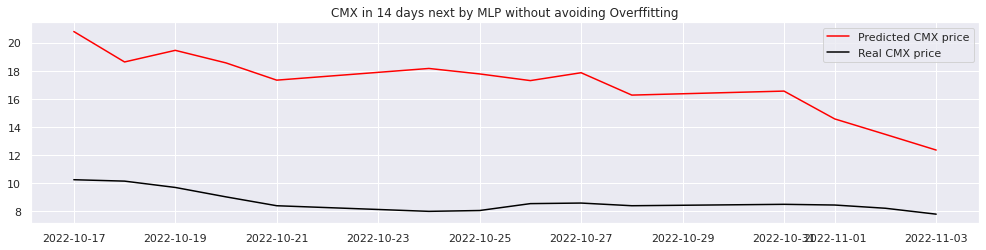

In [ ]:
date = dataset_train['date_publish']

predicted_date = date[len(date) - (predicted_14_day+1):-1]
print(predicted_date.shape)
fig = plt.figure(figsize = (17,17))

plt.subplot(4, 1, 1)
plt.plot(predicted_date,predicted_CMX_price_14_days[:,0],color='red')
plt.plot(predicted_date,real_CMX_price_14_days['price_closing'],color='black')
plt.legend(['Predicted CMX price','Real CMX price'])
plt.title('CMX in 14 days next by MLP without avoiding Overffitting')


(49,)


Text(0.5, 1.0, 'CMX 49 days next by MLP without avoiding Overffitting')

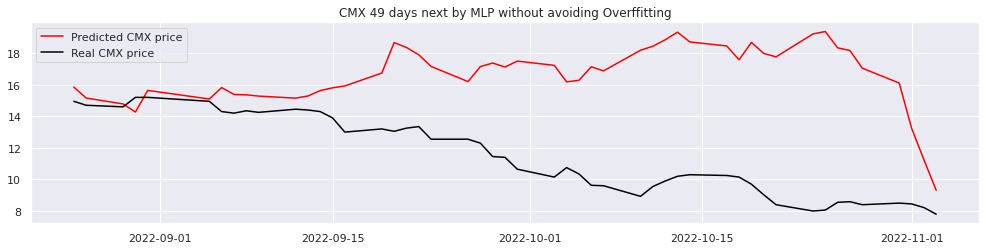

In [ ]:
date = dataset_train['date_publish']

predicted_date = date[len(date) - (predicted_49_day + 1):-1]
print(predicted_date.shape)
fig = plt.figure(figsize = (17,17))

plt.subplot(4, 1, 1)
plt.plot(predicted_date,predicted_CMX_price_49_days[:,0],color='red')
plt.plot(predicted_date,real_CMX_price_49_days['price_closing'],color='black')
plt.legend(['Predicted CMX price','Real CMX price'])
plt.title('CMX 49 days next by MLP without avoiding Overffitting')

In [ ]:
print('Mean Squared Error: ', metrics.mean_squared_error(Y_train, MLP.predict(X_train.reshape(X_train.shape[0], (X_train.shape[1]*X_train.shape[2])))))
print('Mean Absolute Error: ', metrics.mean_absolute_error(Y_train, MLP.predict(X_train.reshape(X_train.shape[0], (X_train.shape[1]*X_train.shape[2])))))
print('R2 Score: ', metrics.r2_score(Y_train, MLP.predict(X_train.reshape(X_train.shape[0], (X_train.shape[1]*X_train.shape[2])))))

Mean Squared Error:  0.005086532752384526
Mean Absolute Error:  0.045094007382456024
R2 Score:  0.8392180266493967


- 
## SVM (Support Vector Machine)

In [ ]:
y = data['price_closing'].values
x = data.values
sc_svm = MinMaxScaler(feature_range=(0,1))

X = sc_svm.fit_transform(x)

Y = sc_svm.fit_transform(y.reshape(-1,1))
print(X[:5])
print(Y[:5])


[[0.54301075 0.33415954]
 [0.55645161 0.0950478 ]
 [0.59139785 0.13844186]
 [0.56182796 0.12995816]
 [0.60752688 0.14311006]]
[[0.54301075]
 [0.55645161]
 [0.59139785]
 [0.56182796]
 [0.60752688]]


In [ ]:
X_train_SVM = []
Y_train_SVM = []

for i in range(before_predicted_day, len(training_set_scaled)):
  X_train_SVM.append(X[i-before_predicted_day:i])
  Y_train_SVM.append(Y[i])


X_train_SVM, Y_train_SVM = np.array(X_train_SVM), np.array(Y_train_SVM)
print(X_train_SVM.shape)
print(Y_train_SVM.shape)

(400, 60, 2)
(400, 1)


In [ ]:
SVM = svm.SVR(kernel='linear',max_iter=5000)
X_train = X_train

start_time = time.time()
SVM.fit(X_train_SVM.reshape(X_train_SVM.shape[0], (X_train_SVM.shape[1] * X_train_SVM.shape[2])), Y_train_SVM)
time_train.append(time.time() - start_time)

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
start_time = time.time()
predicted_CMX_price_14_days = SVM.predict(X_test_14_days.reshape(X_test_14_days.shape[0], (X_test_14_days.shape[1]*X_test_14_days.shape[2])))
predicted_CMX_price_49_days = SVM.predict(X_test_49_days.reshape(X_test_49_days.shape[0], (X_test_49_days.shape[1]*X_test_49_days.shape[2])))
time_predict.append(time.time() - start_time)

print(predicted_CMX_price_14_days.T)
print(predicted_CMX_price_49_days.T)

[0.92838937 0.87522572 0.84333057 0.82036165 0.75273567 0.71481313
 0.67463844 0.67533351 0.70321876 0.65312907 0.55352964 0.45828082
 0.28154727 0.0746604 ]
[0.48597045 0.42384477 0.4244767  0.41848974 0.43186927 0.44611093
 0.45954463 0.43792481 0.46769723 0.48748495 0.51657861 0.57309849
 0.58648828 0.60070568 0.63097797 0.66380865 0.6796344  0.68150409
 0.6758163  0.6280883  0.64588509 0.64631804 0.61704521 0.56271057
 0.52446978 0.52738617 0.54516382 0.57297756 0.60196806 0.63964488
 0.65887582 0.7141956  0.76327579 0.79715214 0.83153826 0.81261232
 0.79912823 0.81468115 0.8019047  0.7853113  0.78611259 0.80622092
 0.76253631 0.77018151 0.71093443 0.59856104 0.46001635 0.28755261
 0.05915942]


In [ ]:
predicted_CMX_price_14_days = sc_svm.inverse_transform(predicted_CMX_price_14_days.reshape(-1,1))
predicted_CMX_price_49_days = sc_svm.inverse_transform(predicted_CMX_price_49_days.reshape(-1,1))

In [ ]:
print(predicted_CMX_price_14_days[:,0])
print(real_CMX_price_14_days.T.values)

print(predicted_CMX_price_49_days[:,0])
print(real_CMX_price_49_days.T.values)

[25.06804232 24.07919848 23.48594853 23.05872668 21.80088345 21.09552416
 20.34827499 20.36120335 20.87986903 19.94820069 18.09565138 16.32402329
 13.03677925  9.18868337]
[[1.025e+01 1.015e+01 9.700e+00 9.030e+00 8.400e+00 8.000e+00 8.060e+00
  8.550e+00 8.590e+00 8.400e+00 8.500e+00 8.450e+00 8.220e+00 7.800e+00]
 [6.277e+09 6.274e+09 2.682e+09 7.127e+09 8.086e+09 5.541e+09 1.965e+09
  3.457e+09 2.884e+09 1.921e+09 2.502e+09 2.056e+09 2.659e+09 5.546e+09]]
[16.83905037 15.68351265 15.69526654 15.58390912 15.8327684  16.09766328
 16.34753005 15.94540155 16.49916848 16.86722015 17.40836216 18.45963191
 18.7086821  18.97312556 19.53619027 20.14684085 20.44119991 20.47597602
 20.37018309 19.48244234 19.81346267 19.82151553 19.27704086 18.26641656
 17.55513792 17.60938279 17.94004699 18.45738255 18.99660589 19.69739483
 20.05509023 21.08403817 21.99692962 22.62702971 23.26661163 22.91458917
 22.66378501 22.95306943 22.7154274  22.40679009 22.42169409 22.7957091
 21.98317541 22.12537611 21

(14,)


Text(0.5, 1.0, 'CMX in 14 days next by SVM without avoiding Overffitting')

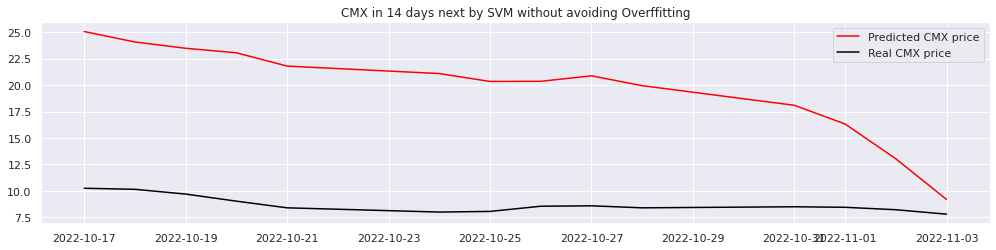

In [ ]:
date = dataset_train['date_publish']

predicted_date = date[len(date) - (predicted_14_day+1):-1]
print(predicted_date.shape)
fig = plt.figure(figsize = (17,17))

plt.subplot(4, 1, 1)
plt.plot(predicted_date,predicted_CMX_price_14_days[:,0],color='red')
plt.plot(predicted_date,real_CMX_price_14_days['price_closing'],color='black')
plt.legend(['Predicted CMX price','Real CMX price'])
plt.title('CMX in 14 days next by SVM without avoiding Overffitting')


(49,)


Text(0.5, 1.0, 'CMX 49 days next by MLP without avoiding Overffitting')

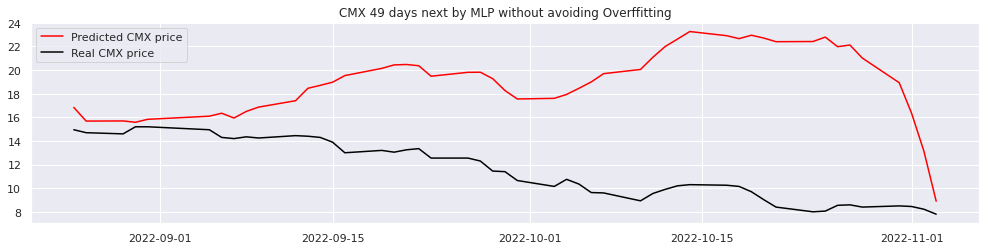

In [ ]:
date = dataset_train['date_publish']

predicted_date = date[len(date) - (predicted_49_day + 1):-1]
print(predicted_date.shape)
fig = plt.figure(figsize = (17,17))

plt.subplot(4, 1, 1)
plt.plot(predicted_date,predicted_CMX_price_49_days[:,0],color='red')
plt.plot(predicted_date,real_CMX_price_49_days['price_closing'],color='black')
plt.legend(['Predicted CMX price','Real CMX price'])
plt.title('CMX 49 days next by MLP without avoiding Overffitting')

In [ ]:
print('Mean Squared Error: ', metrics.mean_squared_error(Y_train_SVM, SVM.predict(X_train_SVM.reshape(X_train.shape[0], (X_train.shape[1]*X_train.shape[2])))))
print('Mean Absolute Error: ', metrics.mean_absolute_error(Y_train_SVM, SVM.predict(X_train_SVM.reshape(X_train.shape[0], (X_train.shape[1]*X_train.shape[2])))))
print('R2 Score: ', metrics.r2_score(Y_train_SVM, SVM.predict(X_train.reshape(X_train_SVM.shape[0], (X_train.shape[1]*X_train.shape[2])))))

Mean Squared Error:  0.0023534961561194473
Mean Absolute Error:  0.03827188170052576
R2 Score:  0.9295479309942747


# **RANDOM FORESTFOREST**

In [ ]:
X_train = []
Y_train = []

for i in range(before_predicted_day, len(training_set_scaled)):
  X_train.append(training_set_scaled[i-before_predicted_day:i])
  Y_train.append(training_set_scaled[i, :])

X_train, Y_train = np.array(X_train), np.array(Y_train)

In [ ]:
print(X_train.shape)
print(Y_train.shape)

(400, 60, 2)
(400, 2)


In [ ]:
real_CMX_price_14_days = data.iloc[len(data) - (predicted_14_day):len(data)+1]
print(real_CMX_price_14_days.shape)

real_CMX_price_49_days = data.iloc[len(data) - (predicted_49_day):len(data)+1]
print(real_CMX_price_49_days.shape)

(14, 2)
(49, 2)


In [ ]:
data_test = data.iloc[len(data) - (before_predicted_day+predicted_14_day+1):len(data) - (predicted_14_day)]

data_train = dataset_train.iloc[:,2:4]

dataset_total = pd.concat([data_train,data_test], axis = 0)

inputs = dataset_total[len(dataset_total) - len(data_test) - before_predicted_day:].values
inputs = sc.fit_transform(inputs)

X_test_14_days = []
for i in range(before_predicted_day, before_predicted_day + predicted_14_day):
  X_test_14_days.append(inputs[i-before_predicted_day:i])

X_test_14_days = np.array(X_test_14_days)
X_test_14_days = X_test_14_days[::-1]
print(X_test_14_days.shape)

(14, 60, 2)


In [ ]:
data_test = data.iloc[len(data) - (before_predicted_day+predicted_49_day+1):len(data) - (predicted_49_day)]

data_train = dataset_train.iloc[:,2:4]

dataset_total = pd.concat([data_train,data_test], axis = 0)

inputs = dataset_total[len(dataset_total) - len(data_test) - before_predicted_day:].values

inputs = sc.fit_transform(inputs)
X_test_49_days = []
for i in range(before_predicted_day, before_predicted_day + predicted_49_day):
  X_test_49_days.append(inputs[i-before_predicted_day:i])
X_test_49_days = np.array(X_test_49_days)
X_test_49_days = X_test_49_days[::-1]
print(X_test_49_days.shape)

(49, 60, 2)


In [ ]:
X_test_14_days = np.reshape(X_test_14_days, (X_test_14_days.shape[0], X_test_14_days.shape[1],2))
print(X_test_14_days.shape)

X_test_49_days = np.reshape(X_test_49_days, (X_test_49_days.shape[0], X_test_49_days.shape[1],2))
print(X_test_49_days.shape)


(14, 60, 2)
(49, 60, 2)


In [ ]:
RF = RandomForestRegressor(n_estimators = 140, random_state = 0)

start_time = time.time()
RF.fit(X_train.reshape(X_train.shape[0], (X_train.shape[1]*X_train.shape[2])), Y_train)
time_train.append(time.time() - start_time)

In [ ]:
start_time = time.time()
predicted_CMX_price_14_days = RF.predict(X_test_14_days.reshape(X_test_14_days.shape[0], (X_test_14_days.shape[1]*X_test_14_days.shape[2])))
predicted_CMX_price_49_days = RF.predict(X_test_49_days.reshape(X_test_49_days.shape[0], (X_test_49_days.shape[1]*X_test_49_days.shape[2])))
time_predict.append(time.time() - start_time)

print(predicted_CMX_price_14_days.T)
print(predicted_CMX_price_49_days.T)

[[0.8437404  0.83375576 0.84210829 0.84051459 0.82549923 0.78486943
  0.78945853 0.83607911 0.83072197 0.82905146 0.81342166 0.79882873
  0.74310676 0.0922619 ]
 [0.68976221 0.68333966 0.68298945 0.6773397  0.65910449 0.58575129
  0.63041729 0.68687556 0.6718014  0.67477343 0.66171815 0.62434656
  0.53420466 0.0469827 ]]
[[0.52607527 0.4921275  0.49347158 0.50769969 0.48231567 0.48183564
  0.47797619 0.48605991 0.5202957  0.52066052 0.6250384  0.62054531
  0.64441244 0.6530914  0.64135945 0.64341398 0.59763825 0.628053
  0.64276114 0.64711982 0.52678571 0.61342166 0.53166283 0.52859063
  0.63068356 0.64721582 0.64675499 0.65180492 0.64855991 0.63813364
  0.64639017 0.64573733 0.63500384 0.63824885 0.66428571 0.75211214
  0.77396313 0.78865207 0.79575653 0.796851   0.80875576 0.8374232
  0.81939324 0.83162442 0.83095238 0.82644009 0.81801075 0.73897849
  0.04425115]
 [0.23263701 0.22195093 0.22211693 0.24523945 0.22590595 0.22316841
  0.21794074 0.2185495  0.23877391 0.22650594 0.259994

In [ ]:
predicted_CMX_price_14_days = sc.inverse_transform(predicted_CMX_price_14_days)
predicted_CMX_price_49_days = sc.inverse_transform(predicted_CMX_price_49_days)

In [ ]:
print(predicted_CMX_price_14_days[:,0])
print(real_CMX_price_14_days.T.values)

[20.16079685 20.01452189 20.13688652 20.11353879 19.89356375 19.29833717
 19.3655674  20.04855895 19.9700768  19.94560388 19.7166273  19.50284082
 18.68651402  9.1516369 ]
[[1.025e+01 1.015e+01 9.700e+00 9.030e+00 8.400e+00 8.000e+00 8.060e+00
  8.550e+00 8.590e+00 8.400e+00 8.500e+00 8.450e+00 8.220e+00 7.800e+00]
 [6.277e+09 6.274e+09 2.682e+09 7.127e+09 8.086e+09 5.541e+09 1.965e+09
  3.457e+09 2.884e+09 1.921e+09 2.502e+09 2.056e+09 2.659e+09 5.546e+09]]


In [ ]:
print(predicted_CMX_price_49_days[:,0])
print(real_CMX_price_49_days.T.values)

[15.50700269 15.00966782 15.02935868 15.2378005  14.86592454 14.85889209
 14.80235119 14.92077765 15.42233199 15.42767665 16.9568126  16.89098886
 17.24064228 17.36778898 17.1959159  17.22601478 16.55540035 17.00097638
 17.21645065 17.2803053  15.51741071 16.7866273  15.58886041 15.54385273
 17.03951421 17.28171179 17.27496064 17.34894201 17.30140265 17.14865783
 17.26961598 17.26005184 17.10280626 17.15034562 17.53178571 18.81844278
 19.13855991 19.35375288 19.45783314 19.47386713 19.64827189 20.06824981
 19.80411098 19.98329781 19.97345238 19.90734735 19.78385753 18.62603495
  8.44827938]
[[1.4950e+01 1.4700e+01 1.4600e+01 1.5200e+01 1.5200e+01 1.4950e+01
  1.4300e+01 1.4200e+01 1.4350e+01 1.4250e+01 1.4450e+01 1.4400e+01
  1.4300e+01 1.3900e+01 1.3000e+01 1.3200e+01 1.3050e+01 1.3250e+01
  1.3350e+01 1.2550e+01 1.2550e+01 1.2300e+01 1.1450e+01 1.1400e+01
  1.0650e+01 1.0150e+01 1.0750e+01 1.0350e+01 9.6300e+00 9.6000e+00
  8.9300e+00 9.5500e+00 9.9000e+00 1.0200e+01 1.0300e+01 1.025

(14,)


Text(0.5, 1.0, 'CMX in 14 days next by RandomForest')

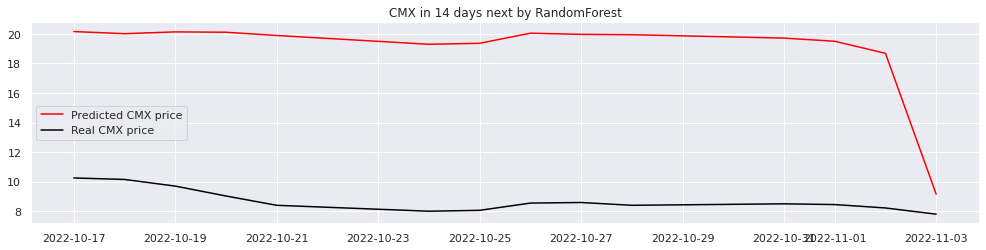

In [ ]:
date = dataset_train['date_publish']

predicted_date = date[len(date) - (predicted_14_day+1):-1]
print(predicted_date.shape)
fig = plt.figure(figsize = (17,17))

plt.subplot(4, 1, 1)
plt.plot(predicted_date,predicted_CMX_price_14_days[:,0],color='red')
plt.plot(predicted_date,real_CMX_price_14_days['price_closing'],color='black')
plt.legend(['Predicted CMX price','Real CMX price'])
plt.title('CMX in 14 days next by RandomForest')

(49,)


Text(0.5, 1.0, 'CMX 49 days next by RF')

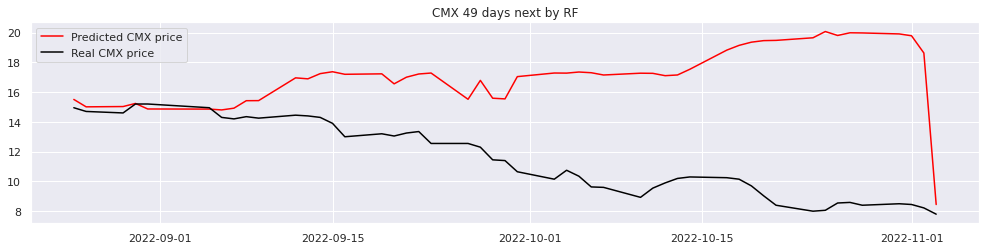

In [ ]:
date = dataset_train['date_publish']

predicted_date = date[len(date) - (predicted_49_day + 1):-1]
print(predicted_date.shape)
fig = plt.figure(figsize = (17,17))

plt.subplot(4, 1, 1)
plt.plot(predicted_date,predicted_CMX_price_49_days[:,0],color='red')
plt.plot(predicted_date,real_CMX_price_49_days['price_closing'],color='black')
plt.legend(['Predicted CMX price','Real CMX price'])
plt.title('CMX 49 days next by RF')

In [ ]:
print('Mean Squared Error: ', metrics.mean_squared_error(Y_train, RF.predict(X_train.reshape(X_train.shape[0], (X_train.shape[1]*X_train.shape[2])))))
print('Mean Absolute Error: ', metrics.mean_absolute_error(Y_train, RF.predict(X_train.reshape(X_train.shape[0], (X_train.shape[1]*X_train.shape[2])))))
print('R2 Score: ', metrics.r2_score(Y_train, RF.predict(X_train.reshape(X_train.shape[0], (X_train.shape[1]*X_train.shape[2])))))

Mean Squared Error:  0.0007395060532997427
Mean Absolute Error:  0.01540495699642367
R2 Score:  0.9764377535530856


# Train time and Predict time

[28.456589698791504, 22.358494520187378, 0.9905080795288086, 0.0088653564453125, 3.016913414001465]


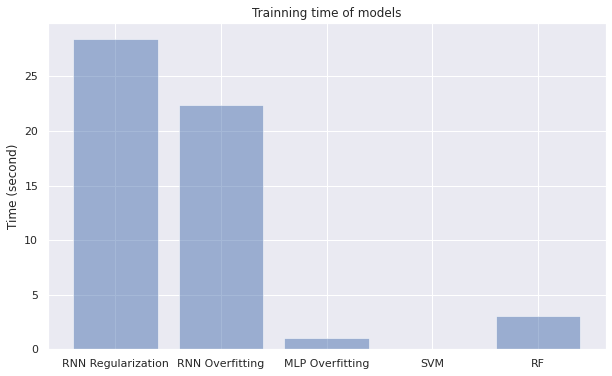

In [ ]:
models = ['RNN Regularization', 'RNN Overfitting','MLP Overfitting', 'SVM','RF']
y_pos = np.arange(len(models))
performance = time_train

print(performance)
plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, models)
plt.ylabel('Time (second)')
plt.title('Trainning time of models')

plt.show()

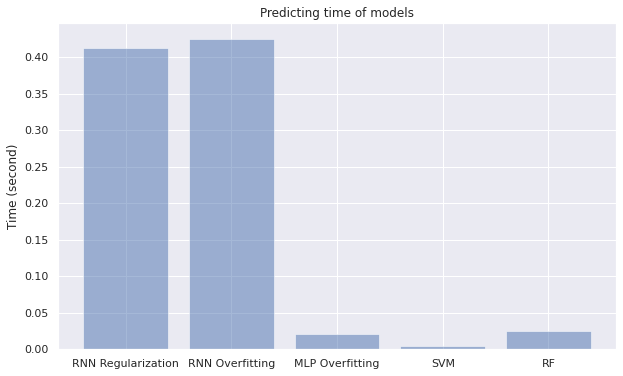

In [ ]:
performance = time_predict

plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, models)
plt.ylabel('Time (second)')
plt.title('Predicting time of models')

plt.show()

## LSTM (Long short-term memory)

In [29]:
regressor = Sequential()

regressor.add(Bidirectional(LSTM(
    units=60,
    kernel_regularizer=tensorflow.keras.regularizers.l2(0.01),
    recurrent_regularizer=tensorflow.keras.regularizers.l2(0.01),
    bias_regularizer=tensorflow.keras.regularizers.l2(0.01),
    activation='softsign', 
    return_sequences=True, input_shape = (60,2))))

regressor.add(Dropout(0.2))

regressor.add(Bidirectional(LSTM(
    units=60,
    activation='softsign',
    return_sequences=False,
    input_shape = (60,2))))

regressor.add(Dense(30,kernel_initializer="glorot_normal",activation='linear'))

regressor.add(Dropout(0.2))

regressor.add(Dense(2,kernel_initializer="uniform",activation='softmax'))

regressor.compile(optimizer = 'adam', loss= 'mean_squared_error', metrics =['accuracy'])
regressor.build(X_train_price.shape)

H_LSTM = regressor.fit(X_train, Y_train, epochs = 100, batch_size= 60)


Epoch 1/100
7/7 [==============================] - 8s 186ms/step - loss: 2.4769 - accuracy: 0.9625
Epoch 2/100
7/7 [==============================] - 2s 281ms/step - loss: 2.2565 - accuracy: 0.9775
Epoch 3/100
7/7 [==============================] - 1s 180ms/step - loss: 2.0723 - accuracy: 0.9775
Epoch 4/100
7/7 [==============================] - 1s 195ms/step - loss: 1.9168 - accuracy: 0.9775
Epoch 5/100
7/7 [==============================] - 1s 175ms/step - loss: 1.7849 - accuracy: 0.9775
Epoch 6/100
7/7 [==============================] - 1s 189ms/step - loss: 1.6719 - accuracy: 0.9775
Epoch 7/100
7/7 [==============================] - 1s 183ms/step - loss: 1.5755 - accuracy: 0.9775
Epoch 8/100
7/7 [==============================] - 1s 189ms/step - loss: 1.4928 - accuracy: 0.9775
Epoch 9/100
7/7 [==============================] - 1s 172ms/step - loss: 1.4215 - accuracy: 0.9775
Epoch 10/100
7/7 [==============================] - 1s 187ms/step - loss: 1.3598 - accuracy: 0.9775
Epoch 11/

In [30]:
regressor.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bidirectional (Bidirectiona  (None, 60, 120)          30240     
 l)                                                              
                                                                 
 dropout (Dropout)           (None, 60, 120)           0         
                                                                 
 bidirectional_1 (Bidirectio  (None, 120)              86880     
 nal)                                                            
                                                                 
 dense (Dense)               (None, 30)                3630      
                                                                 
 dropout_1 (Dropout)         (None, 30)                0         
                                                                 
 dense_1 (Dense)             (None, 2)                 6

In [31]:

predicted_CMX_price_14_days = regressor.predict(X_test_14_days)
predicted_CMX_price_49_days = regressor.predict(X_test_49_days)


print(predicted_CMX_price_14_days.T)
print(predicted_CMX_price_49_days.T)


2/2 [==============================] - 0s 22ms/step
[[0.7325857  0.7354161  0.72703916 0.7221106  0.711591   0.695827
  0.6797246  0.6555567  0.63347715 0.61574656 0.5931493  0.5644628
  0.54089904 0.5266044 ]
 [0.26741424 0.2645839  0.2729608  0.27788937 0.288409   0.30417305
  0.32027543 0.34444338 0.36652288 0.3842534  0.4068507  0.43553728
  0.45910105 0.47339562]]
[[0.6243365  0.6325146  0.63429314 0.6409534  0.64585704 0.64970607
  0.6554149  0.65823466 0.66287464 0.66925853 0.6726617  0.67214584
  0.6723394  0.6748315  0.6801555  0.68034357 0.68277895 0.6868861
  0.6905369  0.6953707  0.6994818  0.70168453 0.7039442  0.706332
  0.70805913 0.710866   0.70998937 0.70762426 0.70234644 0.69705254
  0.6940001  0.68505836 0.67080647 0.65724236 0.64732546 0.63707304
  0.6226653  0.6035883  0.5839882  0.56951994 0.5583885  0.5549177
  0.5532619  0.5422513  0.5385553  0.53691924 0.53634036 0.5278741
  0.52335376]
 [0.3756635  0.36748546 0.36570677 0.35904658 0.35414293 0.3502939
  0.3445

In [32]:
predicted_CMX_price_14_days = sc.inverse_transform(predicted_CMX_price_14_days)
predicted_CMX_price_49_days = sc.inverse_transform(predicted_CMX_price_49_days)

(14,)


Text(0.5, 1.0, 'CMX in 14 days next by LSTM')

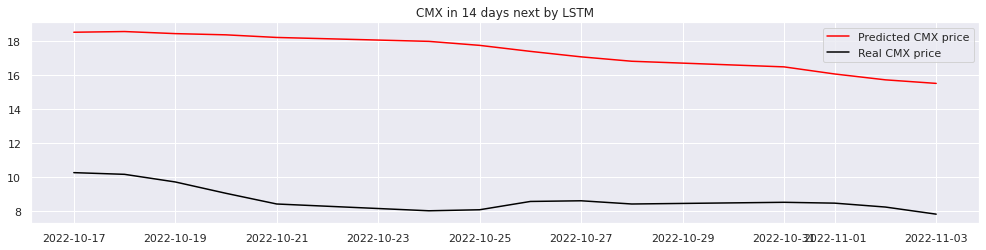

In [33]:
date = dataset_train['date_publish']

predicted_date = date[len(date) - (predicted_14_day+1):-1]
print(predicted_date.shape)
fig = plt.figure(figsize = (17,17))

plt.subplot(4, 1, 1)
plt.plot(predicted_date,predicted_CMX_price_14_days[:,0],color='red')
plt.plot(predicted_date,real_CMX_price_14_days['price_closing'],color='black')
plt.legend(['Predicted CMX price','Real CMX price'])
plt.title('CMX in 14 days next by LSTM')


(49,)


Text(0.5, 1.0, 'CMX 49 days next by LSTM')

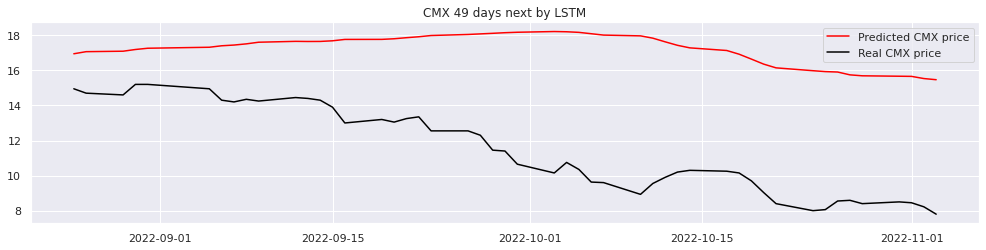

In [34]:
date = dataset_train['date_publish']

predicted_date = date[len(date) - (predicted_49_day + 1):-1]
print(predicted_date.shape)
fig = plt.figure(figsize = (17,17))

plt.subplot(4, 1, 1)
plt.plot(predicted_date,predicted_CMX_price_49_days[:,0],color='red')
plt.plot(predicted_date,real_CMX_price_49_days['price_closing'],color='black')
plt.legend(['Predicted CMX price','Real CMX price'])
plt.title('CMX 49 days next by LSTM')

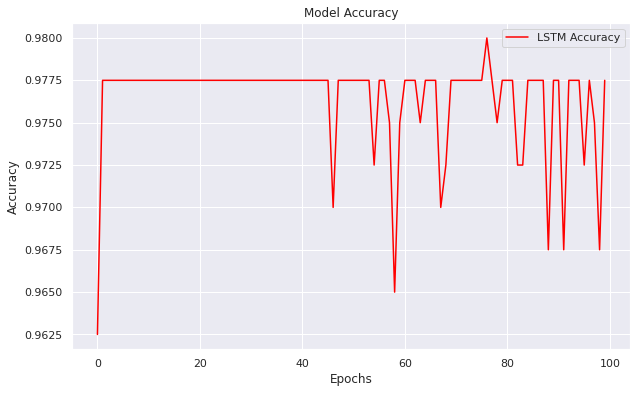

NameError: ignored

In [36]:
H_LSTM.history.keys()

plt.plot(H_LSTM.history['accuracy'], color='red')  

plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['LSTM Accuracy'])
plt.show()

print('Mean Squared Error: ', metrics.mean_squared_error(Y_train,regressor.predict(X_train)))
print('Mean Absolute Error: ', metrics.mean_absolute_error(Y_train, regressor.predict(X_train)))
print('R2 Score: ', metrics.r2_score(Y_train, RNN_Overfitting.predict(X_train)))